In [1]:
import numpy as np
import pandas as pd


Outlier Handling        
Winsorizer      
ArbitraryOutlierCapper      
OutlierTrimmer      

In [2]:
data=pd.DataFrame(dict(
    x=[1,2,3,4,5,6,102],
    y=[11,12,13,14,15,16,152]
))
data

,x,y
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,102,152


Winsorizer      
class feature_engine.outliers.Winsorizer(capping_method='gaussian''quantiles''mad''iqr', tail='right', fold='auto', add_indicators=False, variables=None, missing_values='raise')            
it caps maximum and/or minimum values of a variable at automatically determined values, and optionally adds indicators      
-->fit(x,y=None)                               -Learn the mean or median values     
-->fit_transform(x,y=None,**fit_params)        -Fit to data, then transform it      
-->get_feature_names_out(input_features=None)  -Get output feature names for transformation     
-->get_metadata_routing()                      -Get metadata routing of this object     
-->get_params(deep=True)                       -Get parameters for this estimator       
-->set_params(**params)                        -Set the parameters of this estimator        
-->transform(X)                                -Replace missing data with the learned parameters        

<Axes: >

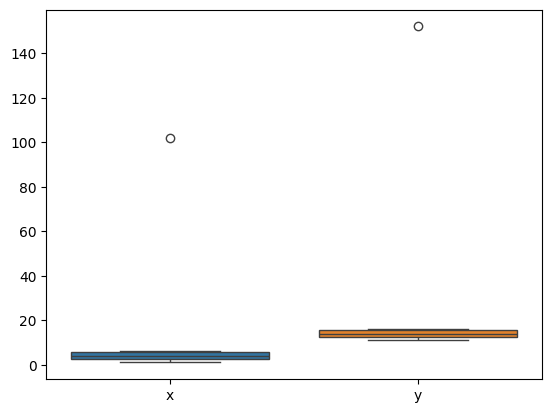

In [3]:
import seaborn as sns
sns.boxplot(data=data)

In [4]:
from feature_engine.outliers import Winsorizer
model_win=Winsorizer(capping_method="iqr")  #we can use iqr or gassian or mad or quantiles
win_data=model_win.fit_transform(data)                   #q3+1.5*iqr,q1-1.5*iqr

<Axes: >

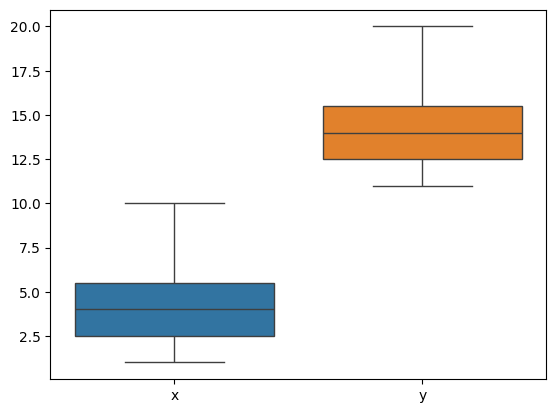

In [5]:
sns.boxplot(data=win_data)

<Axes: >

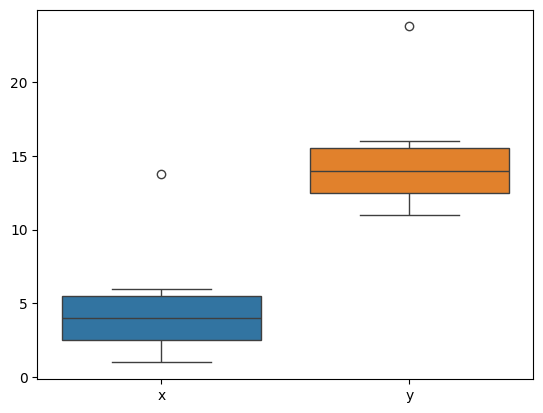

In [7]:
model_win=Winsorizer(capping_method="mad")      #median+-3.29*mad
sns.boxplot(data=model_win.fit_transform(data))

<Axes: >

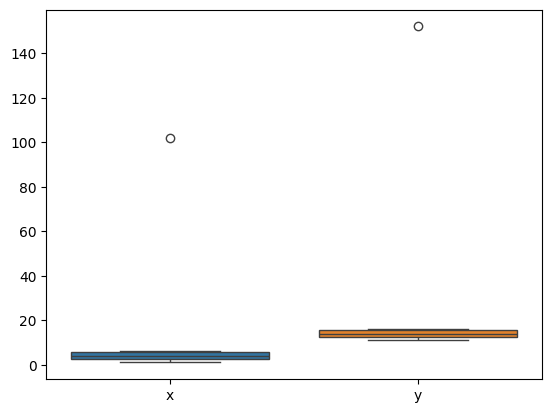

In [8]:
model_win=Winsorizer(capping_method='gaussian')  #mean+-3*standard deviation
sns.boxplot(data=model_win.fit_transform(data))

In [ ]:
model_win=Winsorizer(capping_method='quantiles')  #95th percentile and 5 th percentiel
model_win.fit_transform(data)

,x,y
0,1.0,11.0
1,2.0,12.0
2,3.0,13.0
3,4.0,14.0
4,5.0,15.0
5,6.0,16.0
6,73.2,111.2


ArbitraryOutlierCapper      
class feature_engine.outliers.ArbitraryOutlierCapper(max_capping_dict=None, min_capping_dict=None, missing_values='raise')          
it caps the maximum or minimum values of a variable at an arbitrary value indicated by us       
You must provide the maximum or minimum values          
-->fit(x,y=None)                               -Learn the mean or median values     
-->fit_transform(x,y=None,**fit_params)        -Fit to data, then transform it      
-->get_feature_names_out(input_features=None)  -Get output feature names for transformation     
-->get_metadata_routing()                      -Get metadata routing of this object     
-->get_params(deep=True)                       -Get parameters for this estimator       
-->set_params(**params)                        -Set the parameters of this estimator        
-->transform(X)                                -Replace missing data with the learned parameters 

In [12]:
data

,x,y
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,102,152


In [9]:
from feature_engine.outliers import ArbitraryOutlierCapper
model_out=ArbitraryOutlierCapper(max_capping_dict=dict(x=5,y=13),min_capping_dict=dict(x=1,y=12 ))
att_data=model_out.fit_transform(data)

<Axes: >

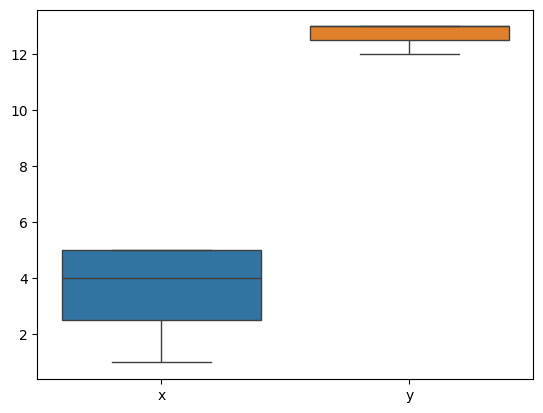

In [10]:
sns.boxplot(data=att_data)

OutlierTrimmer      
class feature_engine.outliers.OutlierTrimmer(capping_method='gaussian', tail='right', fold='auto', variables=None, missing_values='raise')          
it removes observations with outliers from the dataset              
-->fit(x,y=None)                               -Learn the mean or median values     
-->fit_transform(x,y=None,**fit_params)        -Fit to data, then transform it      
-->get_feature_names_out(input_features=None)  -Get output feature names for transformation     
-->get_metadata_routing()                      -Get metadata routing of this object     
-->get_params(deep=True)                       -Get parameters for this estimator       
-->set_params(**params)                        -Set the parameters of this estimator        
-->transform(X)                                -Replace missing data with the learned parameters 

In [17]:
data

,x,y
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,102,152


In [11]:
from feature_engine.outliers import OutlierTrimmer
model_tri=OutlierTrimmer(capping_method="iqr")
out_data=model_tri.fit_transform(data)

<Axes: >

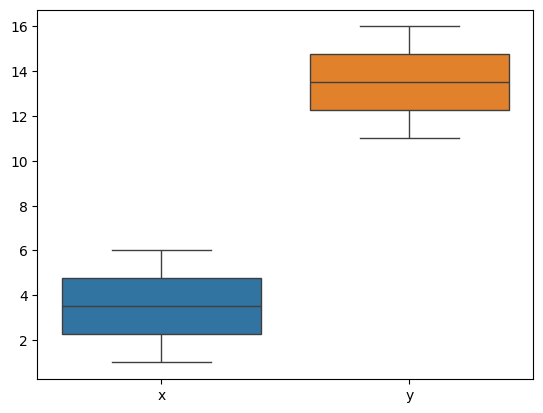

In [12]:
sns.boxplot(data=out_data)

In [20]:
model_tri=OutlierTrimmer(capping_method="mad")
model_tri.fit_transform(data)

,x,y
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16


In [21]:
model_tri=OutlierTrimmer(capping_method="gaussian")
model_tri.fit_transform(data)

,x,y
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,102,152


In [24]:
model_tri=OutlierTrimmer(capping_method="quantiles")
model_tri.fit_transform(data)

,x,y
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
